In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
from datetime import datetime as dt
train.deadline =pd.to_datetime(train['deadline'],unit='s')#.dt.strftime('%Y%m%d')
train.state_changed_at =pd.to_datetime(train['state_changed_at'],unit='s')#.dt.strftime('%Y%m%d')
train.created_at =pd.to_datetime(train['created_at'],unit='s')#.dt.strftime('%Y%m%d')
train.launched_at =pd.to_datetime(train['launched_at'],unit='s')#.dt.strftime('%Y%m%d')

In [4]:
train['Start2Finsih']= train.deadline - train.created_at
train['Launch2Finsih']= train.deadline - train.launched_at
train['Launch2Status']= train.state_changed_at - train.launched_at
train['Create2Launch']= train.launched_at -train.created_at
#train['Finish2Status']= train.state_changed_at -train.deadline

In [5]:
train['Start2Finsih'] = train['Start2Finsih'].dt.days
train['Launch2Finsih']= train['Launch2Finsih'].dt.days
train['Launch2Status']= train['Launch2Status'].dt.days
train['Create2Launch']= train['Create2Launch'].dt.days
#train['Finish2Status']= train['Finish2Status'].dt.days

In [6]:
train.deadline =pd.to_datetime(train['deadline'],unit='s').dt.strftime('%Y%m%d')
train.state_changed_at =pd.to_datetime(train['state_changed_at'],unit='s').dt.strftime('%Y%m%d')
train.created_at =pd.to_datetime(train['created_at'],unit='s').dt.strftime('%Y%m%d')
train.launched_at =pd.to_datetime(train['launched_at'],unit='s').dt.strftime('%Y%m%d')


In [7]:
train = train.drop(['name','desc','keywords'],axis=1)

In [8]:
train['disable_communication']= train['disable_communication'].astype('str')
train['disable_communication'] = train['disable_communication'].replace(to_replace=['False', 'True'], value=[0, 1])

In [9]:
cur = pd.get_dummies(train.country,prefix='C')
dur = pd.get_dummies(train.disable_communication,prefix='D')

In [10]:
new_train = pd.concat([train,cur],axis=1)

In [11]:
new_train = new_train.drop(['currency','country','project_id','disable_communication'],axis=1)

In [12]:
X = new_train.drop('final_status',axis=1)
y = new_train['final_status']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [14]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size = .3,  random_state=12)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
trained_model = clf.fit(X_train, y_train)
trained_model.fit(X_train, y_train)
predictions = trained_model.predict(X_test)      
from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_train, trained_model.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test, predictions))
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix
class_report = classification_report(y_test,predictions)
print(class_report)

Train Accuracy: 0.9924164354604307
Test Accuracy: 0.8521532722956935
             precision    recall  f1-score   support

          0       0.88      0.90      0.89     22120
          1       0.78      0.75      0.76     10319

avg / total       0.85      0.85      0.85     32439



In [15]:
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

# param_grid = { 
#     'n_estimators': [10, 50],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc,param_grid =param_grid,cv= 5,verbose =1,n_jobs = -1)
# CV_rfc.fit(X_train, y_train)

In [16]:
# CV_rfc.best_score_

In [17]:
# CV_rfc.best_estimator_

In [18]:
# CV_rfc.best_params_

In [19]:
# pred = CV_rfc.predict(X_test)

In [20]:
# print('Train Accuracy:',accuracy_score(y_train, CV_rfc.predict(X_train)))
# print('Test Accuracy:', accuracy_score(y_test, pred))

In [21]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred1=rfc1.predict(X_test)


In [22]:
rfc1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred1))
print('Train Accuracy:',accuracy_score(y_train, rfc1.predict(X_train)))
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, pred1)
confusion_matrix
class_report = classification_report(y_test,pred1)
print(class_report)

Accuracy for Random Forest on CV data:  0.8560991399241653
Train Accuracy: 0.8649359228431761
             precision    recall  f1-score   support

          0       0.92      0.87      0.89     22120
          1       0.75      0.83      0.79     10319

avg / total       0.86      0.86      0.86     32439



## Test_new_data

In [24]:
test = pd.read_csv('new_test.csv')

In [25]:
X_train.head()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,Start2Finsih,Launch2Finsih,Launch2Status,Create2Launch,...,C_CA,C_DE,C_DK,C_GB,C_IE,C_NL,C_NO,C_NZ,C_SE,C_US
80194,1000.0,20141104,20141104,20141004,20141004,3,30,30,30,0,...,0,0,0,1,0,0,0,0,0,0
91987,1000.0,20150216,20150216,20150117,20150120,5,29,26,26,3,...,0,0,0,0,0,0,0,0,0,1
17756,1600.0,20120326,20120326,20120204,20120220,40,51,35,35,16,...,0,0,0,0,0,0,0,0,0,1
24554,5000.0,20120719,20120719,20120311,20120619,34,130,30,30,100,...,0,0,0,0,0,0,0,0,0,1
2809,6800.0,20101006,20101006,20100804,20100812,25,62,55,55,7,...,0,0,0,0,0,0,0,0,0,1


In [26]:
test.head()

,Unnamed: 0,id,goal,country,created_at,deadline,launched_at,state_changed_at,backers_count,usd_pledged,...,C_IT,C_JP,C_LU,C_MX,C_NL,C_NO,C_NZ,C_SE,C_SG,C_US
0,0,1123889576,1000,US,20150624,20151023,20150926,20151023,53,1884,...,0,0,0,0,0,0,0,0,0,1
1,1,1724173143,15000,US,20140506,20150521,20150421,20150521,465,21882,...,0,0,0,0,0,0,0,0,0,1
2,2,707260502,10000,US,20141129,20150109,20141209,20150109,294,17176,...,0,0,0,0,0,0,0,0,0,1
3,3,497637964,150,US,20141119,20151126,20151027,20151126,45,970,...,0,0,0,0,0,0,0,0,0,1
4,4,1546008758,7500,US,20120411,20120921,20120822,20120921,28,7576,...,0,0,0,0,0,0,0,0,0,1


In [27]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['goal', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'backers_count', 'Start2Finsih', 'Launch2Finsih', 'Launch2Status',
       'Create2Launch', 'C_AU', 'C_CA', 'C_DE', 'C_DK', 'C_GB', 'C_IE', 'C_NL',
       'C_NO', 'C_NZ', 'C_SE', 'C_US'],
      dtype='object')

In [28]:
predictions = rfc1.predict(test[wanted_test_columns])


In [29]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Original_final_status'] = test['final_status']
submission['Predicted_final_status'] = predictions # our model predictions on the test dataset
submission.head()

,id,Original_final_status,Predicted_final_status
0,1123889576,1,1
1,1724173143,1,1
2,707260502,1,1
3,497637964,1,1
4,1546008758,1,0


In [30]:
submission.shape

(289551, 3)

In [31]:
pd.crosstab(submission['Original_final_status'] ,submission['Predicted_final_status'],rownames=['ACTUAL'],colnames=['PRED'] )

PRED,0,1
ACTUAL,,
0,130916,4040
1,38573,116022


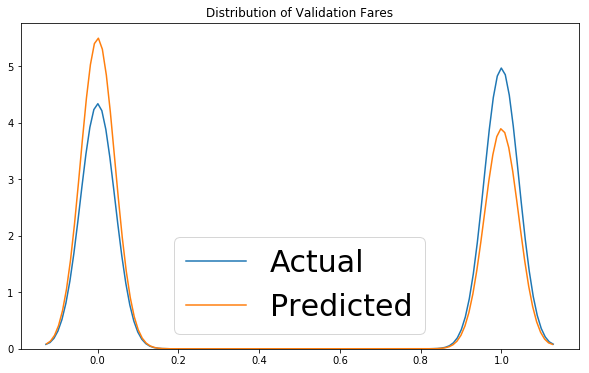

In [32]:
plt.figure(figsize = (10, 6))
sns.kdeplot(submission['Original_final_status'], label = 'Actual')
sns.kdeplot(submission['Predicted_final_status'], label = 'Predicted')
plt.legend(prop = {'size': 30})
plt.title("Distribution of Validation Fares");

In [33]:

analyze = pd.DataFrame({'predicted': submission['Predicted_final_status'], 'actual': submission['Original_final_status']})
analyze.describe()

,predicted,actual
count,289551.000000,289551.000000
mean,0.414649,0.533913
std,0.492662,0.498849
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [34]:
submission['Result'] = np.where((submission['Original_final_status']== submission['Predicted_final_status']),1,0)

In [35]:
Correct = len(submission[submission.Result==1])
Total = len(submission)

In [36]:
R = Correct/Total
R

0.8528307621109925

## Test App in Heroku 

In [2]:
heroku_url = 'https://kickstarter001.herokuapp.com/'
import json
data = {'goal':1000,
 'deadline':'20120601',
 'state_changed_at':'20120601',
 'created_at':'20120419',
 'launched_at':'20120502',
       'backers_count':19,
 'Start2Finsih':42,
 'Launch2Finsih':30,
 'Launch2Status':30,
       'Create2Launch':12,
 'C_AU':0,
 'C_CA':0,
 'C_DE':0,
 'C_DK':0,
 'C_GB':0,
 'C_IE':0,
 'C_NL':0,
       'C_NO':0,
 'C_NZ':0,
 'C_SE':0,
 'C_US':1}
# data_in =[1000,
# '20120601',
# '20120601',
# '20120419',
# '20120502',
# 19,
# 42,
# 30,
# 30,
# 12,
# 0,
# 0,
# 0,
# 0,
# 0,
# 0,
# 0,
# 0,
# 0,
# 0,
# 1]


data = json.dumps(data)
data


'{"goal": 1000, "deadline": "20120601", "state_changed_at": "20120601", "created_at": "20120419", "launched_at": "20120502", "backers_count": 19, "Start2Finsih": 42, "Launch2Finsih": 30, "Launch2Status": 30, "Create2Launch": 12, "C_AU": 0, "C_CA": 0, "C_DE": 0, "C_DK": 0, "C_GB": 0, "C_IE": 0, "C_NL": 0, "C_NO": 0, "C_NZ": 0, "C_SE": 0, "C_US": 1}'

In [3]:
import requests
r_survey = requests.post(heroku_url,data)
print(r_survey)

<Response [404]>


In [62]:
print(r_survey.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Save Model 

In [24]:
import pickle

In [25]:
with open('KickStart_model.pkl', 'wb') as f:
    pickle.dump(rfc1, f)

In [26]:
with open('KickStart_model.pkl', 'rb') as f:
    rfc1_loaded = pickle.load(f)

In [27]:
# import pickle
# pickl = {'model':CV_rfc.best_estimator_}
# pickle.dump(pickl,open('model_file'+ ".p","wb"))

In [28]:
# file_name = 'model_file.p'
# with open(file_name,'rb') as pickled:
#     data = pickle.load(pickled)
#     model = data['model']

# Test Flask in Production


In [4]:
 
import requests
import json

In [16]:
url = 'http://127.0.0.1:5000'

# test data
# data = {  
#   'goal': 300,
#   'deadline': '20130227',
#   'state_changed_at': '20130227',
#   'created_at': '20130204',
#   'launched_at': '20130207',
#   'backers_count': 15,
#   'Start2Finsih': 23,
#   'Launch2Finsih': 20,
#   'Launch2Status': 20,
#   'Create2Launch': 3,
#   'C_AU': 0,
#   'C_CA': 0,
#   'C_DE': 0,
#   'C_DK': 0,
#   'C_GB': 0,
#   'C_IE': 0,
#   'C_NL': 0,
#   'C_NO': 0,
#   'C_NZ': 0,
#   'C_SE': 0,
#   'C_US': 1

# }
data_in =[1000,
'20120601',
'20120601',
'20120419',
'20120502',
19,
42,
30,
30,
12,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1]
data = json.dumps(data_in)
data

'[1000, "20120601", "20120601", "20120419", "20120502", 19, 42, 30, 30, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'

In [17]:
r_survey = requests.post(url, data)
print(url)
print(r_survey)

http://127.0.0.1:5000
<Response [404]>


In [9]:
send_request = requests.post(url, data)
print(send_request)

<Response [404]>


In [10]:
print(send_request.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [85]:
import requests 
#from data_input1 import data_in
import json
url = 'http://127.0.0.1:5000/predict'
headers = {"Content-Type": "application/json"}
data = {  
  'goal': 300,
  'deadline': '20130227',
  'state_changed_at': '20130227',
  'created_at': '20130204',
  'launched_at': '20130207',
  'backers_count': 15,
  'Start2Finsih': 23,
  'Launch2Finsih': 20,
  'Launch2Status': 20,
  'Create2Launch': 3,
  'C_AU': 0,
  'C_CA': 0,
  'C_DE': 0,
  'C_DK': 0,
  'C_GB': 0,
  'C_IE': 0,
  'C_NL': 0,
  'C_NO': 0,
  'C_NZ': 0,
  'C_SE': 0,
  'C_US': 1

}
data = json.dumps(data)
#r_survey = requests.post(url, data)
send_request = requests.post(url, data)
print(send_request.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)